In [1]:
# Loading up Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
# Loading Dataset
df = pd.read_csv('student dropout.csv')

# Displaying first few rows
print(df.head(50))

In [ ]:
# Checking for missing values
print(df.isnull().sum())

In [ ]:
# dropping variables we dont need
non_beneficial_columns = [
    'Nacionality',
    'Educational special needs',
    'Inflation rate',
    'Mother\'s qualification',
    'Curricular units 1st sem (without evaluations)',
    'Marital status',
    'Previous qualification',
    'Curricular units 2nd sem (without evaluations)',
    'Application mode',
    'Unemployment rate',
    'Course',
    'International',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Application order',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)',
    'Daytime/evening attendance'
]

# Drop the non-beneficial columns from the dataframe
df.drop(columns=non_beneficial_columns, inplace=True)

print(df.info())

In [ ]:
# Updating 'Target' column to change 'Graduate' and 'enrolled' to 'still enrolled'
df['Target'] = df['Target'].replace(['Graduate', 'Enrolled'], 'Still enrolled')

# Display the updated DataFrame
print(df.head(100))


In [ ]:
# Encoding 'df' for models

# Verify the current state of df
print("Current state of df:")
print(df.head())

# Check unique values in the Target column
print("Unique values in the Target column before encoding:", df['Target'].unique())

# Custom encoding for Target column: Dropout = 0, Enrolled and Graduate = 1
df['Target'] = df['Target'].apply(lambda x: 0 if x == 'Dropout' else 1)

# Check unique values in the Target column after encoding
print("Unique values in the Target column after encoding:", df['Target'].unique())

# Feature Scaling for numerical columns
numeric_columns = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'GDP']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display basic information about the dataframe to confirm changes
print(df.info())

# Display the first few rows to verify the transformations
print(df.head())


In [ ]:
# Statistical summary for numerical features
numerical_summary = df.describe()
print("Numerical Summary:\n", numerical_summary)


In [ ]:
# Histograms for numerical features
numerical_columns = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'GDP']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Percentage distribution for categorical variables
# I firstly identify potential categorical columns
potential_categoricals = [col for col in df.columns if df[col].nunique() < 10 and col != 'Target']

# Display identified categorical columns
print("Potential Categorical Columns:", potential_categoricals)

for column in potential_categoricals:
    print(f"\nDistribution for {column}:")
    print(df[column].value_counts())
    print(df[column].value_counts(normalize=True) * 100)


In [ ]:
# Bar plots for categorical features against the Target

categorical_columns = potential_categoricals  # Assuming these are the same as potential_categoricals

# Bar plots for categorical features against the Target
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, hue='Target', data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

In [131]:
# Detailed statistics for continuous variables
continuous_columns = [ 'GDP']  # Example continuous variables
continuous_stats = {column: {
    'Mean': df[column].mean(),
    'Median': df[column].median(),
    'Mode': df[column].mode()[0],  # Mode can have multiple values; we take the first one
    'Standard Deviation': df[column].std(),
    'Variance': df[column].var(),
    'Range': (df[column].min(), df[column].max()),
    'Skewness': stats.skew(df[column]),
    'Kurtosis': stats.kurtosis(df[column])
} for column in continuous_columns}
print("Continuous Variables Statistics:\n", continuous_stats)

Continuous Variables Statistics:
 {'GDP': {'Mean': 2.5697748128755883e-17, 'Median': 0.14012166938988344, 'Mode': 0.14012166938988344, 'Standard Deviation': 1.0001130390553545, 'Variance': 1.0002260908885372, 'Range': (-1.7896667428492534, 1.545606837207885), 'Skewness': -0.393934581721279, 'Kurtosis': -1.001877468014888}}


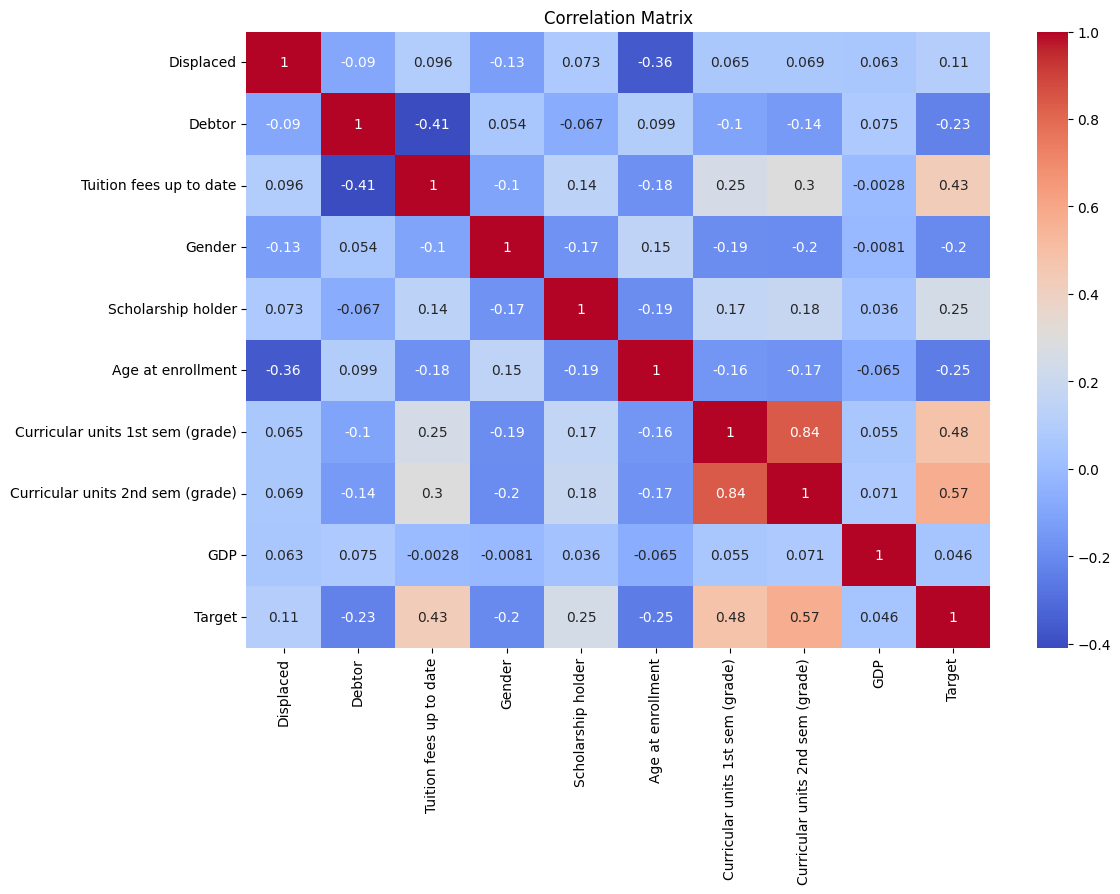

In [14]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Examine Data Distribution to begin our check on bias and imbalance

# Display the distribution of the target variable
target_distribution = df['Target'].value_counts(normalize=True)
print("Distribution of the Target Variable:\n", target_distribution)

# Plot the distribution of the target variablE
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


Gender Distribution in the Dataset:
 Gender
0    0.648282
1    0.351718
Name: proportion, dtype: float64


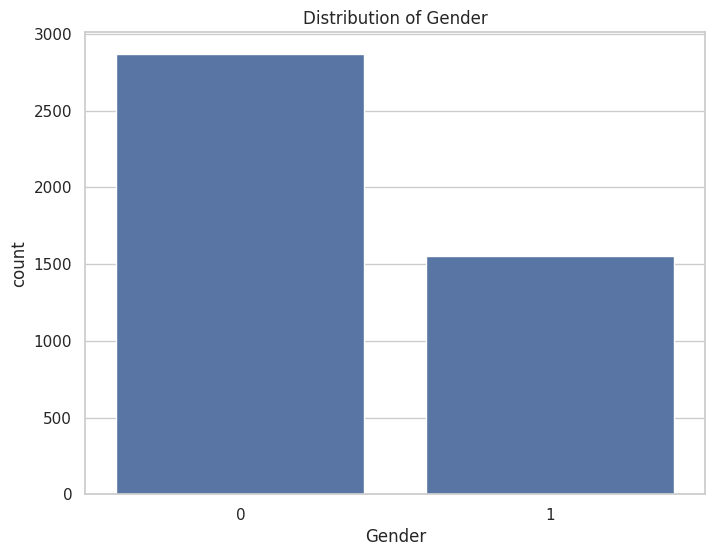

In [134]:
# Display the distribution of the gender attribute
gender_distribution = df['Gender'].value_counts(normalize=True)
print("Gender Distribution in the Dataset:\n", gender_distribution)

# Plot the distribution of the gender attribute
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()


In [ ]:
# Display the distribution of the age attribute
age_distribution = df['Age at enrollment'].describe()
print("Age Distribution in the Dataset:\n", age_distribution)

# Plot the distribution of the age attribute
plt.figure(figsize=(8, 6))
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.show()


In [ ]:
# Distribution of target variable by gender
target_by_gender = pd.crosstab(df['Gender'], df['Target'], normalize='index')
print("\nTarget Distribution by Gender:\n", target_by_gender)

# Plot the distribution of the target variable by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', hue='Gender', data=df)
plt.title('Target Distribution by Gender')
plt.show()


In [ ]:
# Create age groups with better coverage
df2 = df.copy()

df2['Age Group'] = pd.cut(df['Age at enrollment'], bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7], labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65-75', '>75'])

# Check the unique values in the 'Age Group' column again
print(df2['Age Group'].unique())

# Display the distribution of the 'Age Group' column again
print(df2['Age Group'].value_counts())


In [ ]:
# Distribution of target variable by age group
target_by_age_group = pd.crosstab(df2['Age Group'], df2['Target'], normalize='index')
print("\nTarget Distribution by Age Group:\n", target_by_age_group)

# Plot the distribution of the target variable by age group
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', hue='Age Group', data=df2)
plt.title('Target Distribution by Age Group')
plt.show()


In [ ]:
# MODEL IMPLEMENTATION

In [139]:
# Stacked Model

In [19]:
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


# Initialize the Stacking Classifier with default parameters
stacked_model_untuned = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=10000, random_state=42),
    cv=3
)

# Train the model
stacked_model_untuned.fit(X_train, y_train)

# Predict on the test set
y_pred_stacked_untuned = stacked_model_untuned.predict(X_test)

# Evaluate the model
print("Ensemble Model (Untuned Version)")
print("Accuracy:", accuracy_score(y_test, y_pred_stacked_untuned))
print("Classification Report:\n", classification_report(y_test, y_pred_stacked_untuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_untuned))


Training set shape: (3539, 9) (3539,)
Testing set shape: (885, 9) (885,)
Ensemble Model (Untuned Version)
Accuracy: 0.8350282485875706
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.63      0.73       316
           1       0.82      0.95      0.88       569

    accuracy                           0.84       885
   macro avg       0.85      0.79      0.81       885
weighted avg       0.84      0.84      0.83       885

Confusion Matrix:
 [[199 117]
 [ 29 540]]


In [93]:
#Sample a Subset of the Data

# Sample 10% of the data for hyperparameter tuning
df_sample = df.sample(frac=0.1, random_state=42)

# Split the sampled data into features and target
X_sample = df_sample.drop('Target', axis=1)
y_sample = df_sample['Target']

# Split the dataset into training and testing sets
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


In [140]:
# Define the reduced parameter grid
param_grid = {
    'lr__C': [0.1, 1],
    'lr__penalty': ['l2'],
    'svc__C': [1, 10],
    'svc__kernel': ['linear'],
    'rf__n_estimators': [50],
    'rf__max_depth': [10, 20],
    'final_estimator__C': [0.1, 1],
    'final_estimator__penalty': ['l2']
}

# Initialize the StackingClassifier with fewer base learners
stacked_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=10000)),
        ('svc', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ],
    final_estimator=LogisticRegression(max_iter=10000),
    cv=3
)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the sampled data
grid_search.fit(X_sample_train, y_sample_train)

# Best parameters and score from the sampled data
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters from Sampled Data:", best_params)
print("Best Cross-Validation Score from Sampled Data:", best_score)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters from Sampled Data: {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l2', 'lr__C': 1, 'lr__penalty': 'l2', 'rf__max_depth': 10, 'rf__n_estimators': 50, 'svc__C': 1, 'svc__kernel': 'linear'}
Best Cross-Validation Score from Sampled Data: 0.8933889796165245


In [141]:
# Split the full dataset into features and target
X_full = df.drop('Target', axis=1)
y_full = df['Target']

# Split the full dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Initialize the best model with found parameters
best_stacked_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=10000, C=best_params['lr__C'], penalty=best_params['lr__penalty'])),
        ('svc', SVC(probability=True, C=best_params['svc__C'], kernel=best_params['svc__kernel'])),
        ('rf', RandomForestClassifier(n_estimators=best_params['rf__n_estimators'], max_depth=best_params['rf__max_depth']))
    ],
    final_estimator=LogisticRegression(max_iter=10000, C=best_params['final_estimator__C'], penalty=best_params['final_estimator__penalty']),
    cv=3
)

# Train the best model on the full training set
best_stacked_model.fit(X_train, y_train)
y_pred_best = best_stacked_model.predict(X_test)

# Evaluate the best model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("\nTest Set Performance for Tuned Stacked Model:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)



Test Set Performance for Tuned Stacked Model:
Accuracy: 0.8260
Precision: 0.8158
Recall: 0.9420
F1-score: 0.8744
Confusion Matrix:
 [[195 121]
 [ 33 536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.62      0.72       316
           1       0.82      0.94      0.87       569

    accuracy                           0.83       885
   macro avg       0.84      0.78      0.80       885
weighted avg       0.83      0.83      0.82       885



In [ ]:
# SVM

In [20]:
from sklearn.svm import SVC

# Initialize the SVM model with default parameters
svm_model_untuned = SVC(probability=True, random_state=42)

# Train the model
svm_model_untuned.fit(X_train, y_train)

# Predict on the test set
y_pred_svm_untuned = svm_model_untuned.predict(X_test)

# Evaluate the model
print("Support Vector Machine (Untuned Version)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_untuned))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_untuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_untuned))


Support Vector Machine (Untuned Version)
Accuracy: 0.8282485875706215
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.60      0.71       316
           1       0.81      0.95      0.88       569

    accuracy                           0.83       885
   macro avg       0.85      0.78      0.80       885
weighted avg       0.84      0.83      0.82       885

Confusion Matrix:
 [[190 126]
 [ 26 543]]


In [142]:
# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with SVM
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8985785411293362


In [143]:
# Initialize the SVM model with the best parameters
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'], probability=True)

# Train the SVM model on the full training set
best_svm_model.fit(X_train, y_train)
y_pred_best = best_svm_model.predict(X_test)

# Evaluate the SVM model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("\nTest Set Performance for Tuned SVM:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)



Test Set Performance for Tuned SVM:
Accuracy: 0.8282
Precision: 0.8126
Recall: 0.9525
F1-score: 0.8770
Confusion Matrix:
 [[191 125]
 [ 27 542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.60      0.72       316
           1       0.81      0.95      0.88       569

    accuracy                           0.83       885
   macro avg       0.84      0.78      0.80       885
weighted avg       0.84      0.83      0.82       885



In [ ]:
# Random Forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model with default parameters
rf_model_untuned = RandomForestClassifier(random_state=42)

# Train the model
rf_model_untuned.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_untuned = rf_model_untuned.predict(X_test)

# Evaluate the model
print("Random Forest (Untuned Version)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_untuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_untuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_untuned))


Random Forest (Untuned Version)
Accuracy: 0.8259887005649718
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73       316
           1       0.83      0.92      0.87       569

    accuracy                           0.83       885
   macro avg       0.82      0.79      0.80       885
weighted avg       0.83      0.83      0.82       885

Confusion Matrix:
 [[207 109]
 [ 45 524]]


In [144]:
#Define Hyperparameter Grid

# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.9018147663079779


In [145]:
# Train and Evaluate on Full Dataset

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap']
)

# Train the Random Forest model on the full training set
best_rf_model.fit(X_train, y_train)
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the Random Forest model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("\nTest Set Performance for Tuned Random Forest:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)



Test Set Performance for Tuned Random Forest:
Accuracy: 0.8294
Precision: 0.8266
Recall: 0.9297
F1-score: 0.8751
Confusion Matrix:
 [[205 111]
 [ 40 529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       316
           1       0.83      0.93      0.88       569

    accuracy                           0.83       885
   macro avg       0.83      0.79      0.80       885
weighted avg       0.83      0.83      0.82       885



In [57]:
# Fairness and Bias Analysis for SVM and Random Forest Because SVM model is the best overall performer based on the highest F1-score and recall while Random Forest model is slightly better in terms of precision and overall accuracy.

In [146]:
# Function to evaluate model performance by group
def evaluate_by_group(model, X_test, y_test, group_col):
    results = {}
    for group in X_test[group_col].unique():
        X_group = X_test[X_test[group_col] == group]
        y_group = y_test[X_test[group_col] == group]
        y_pred_group = model.predict(X_group)
        report = classification_report(y_group, y_pred_group, output_dict=True)
        results[group] = report
    return results

In [ ]:
# Evaluate Model Performance by Gender

In [147]:
# Assume X_test and y_test are defined as the test sets after resampling and preprocessing
gender_results_svm = evaluate_by_group(best_svm_model, X_test, y_test, 'Gender')
print("\nSVM Model Performance by Gender:\n", gender_results_svm)


SVM Model Performance by Gender:
 {0: {'0': {'precision': 0.8712871287128713, 'recall': 0.5751633986928104, 'f1-score': 0.6929133858267715, 'support': 153}, '1': {'precision': 0.8668032786885246, 'recall': 0.9701834862385321, 'f1-score': 0.9155844155844155, 'support': 436}, 'accuracy': 0.8675721561969439, 'macro avg': {'precision': 0.8690452037006979, 'recall': 0.7726734424656713, 'f1-score': 0.8042489007055935, 'support': 589}, 'weighted avg': {'precision': 0.867968013924051, 'recall': 0.8675721561969439, 'f1-score': 0.8577428747475403, 'support': 589}}, 1: {'0': {'precision': 0.8803418803418803, 'recall': 0.6319018404907976, 'f1-score': 0.7357142857142858, 'support': 163}, '1': {'precision': 0.664804469273743, 'recall': 0.8947368421052632, 'f1-score': 0.7628205128205128, 'support': 133}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7725731748078117, 'recall': 0.7633193412980304, 'f1-score': 0.7492673992673993, 'support': 296}, 'weighted avg': {'precision': 0.7834956787470755, 'rec

In [148]:
# Evaluate Random Forest model by gender
gender_results_rf = evaluate_by_group(best_rf_model, X_test, y_test, 'Gender')
print("\nRandom Forest Model Performance by Gender:\n", gender_results_rf)



Random Forest Model Performance by Gender:
 {0: {'0': {'precision': 0.8407079646017699, 'recall': 0.6209150326797386, 'f1-score': 0.7142857142857143, 'support': 153}, '1': {'precision': 0.8781512605042017, 'recall': 0.9587155963302753, 'f1-score': 0.9166666666666667, 'support': 436}, 'accuracy': 0.8709677419354839, 'macro avg': {'precision': 0.8594296125529858, 'recall': 0.7898153145050069, 'f1-score': 0.8154761904761905, 'support': 589}, 'weighted avg': {'precision': 0.8684249035040793, 'recall': 0.8709677419354839, 'f1-score': 0.864095723178915, 'support': 589}}, 1: {'0': {'precision': 0.8333333333333334, 'recall': 0.6748466257668712, 'f1-score': 0.7457627118644068, 'support': 163}, '1': {'precision': 0.676829268292683, 'recall': 0.8345864661654135, 'f1-score': 0.7474747474747475, 'support': 133}, 'accuracy': 0.7466216216216216, 'macro avg': {'precision': 0.7550813008130082, 'recall': 0.7547165459661423, 'f1-score': 0.7466187296695772, 'support': 296}, 'weighted avg': {'precision': 

In [ ]:
# Evaluate Model Performance by GDP

In [149]:
# Evaluate SVM model by GDP
GDP_results_svm = evaluate_by_group(best_svm_model, X_test, y_test, 'GDP')
print("\nSVM Model Performance by GDP:\n", GDP_results_svm)


SVM Model Performance by GDP:
 {0.8891263042772198: {'0': {'precision': 0.7894736842105263, 'recall': 0.5, 'f1-score': 0.6122448979591837, 'support': 30}, '1': {'precision': 0.7887323943661971, 'recall': 0.9333333333333333, 'f1-score': 0.8549618320610686, 'support': 60}, 'accuracy': 0.7888888888888889, 'macro avg': {'precision': 0.7891030392883618, 'recall': 0.7166666666666667, 'f1-score': 0.7336033650101261, 'support': 90}, 'weighted avg': {'precision': 0.7889794909809735, 'recall': 0.7888888888888889, 'f1-score': 0.7740561873604404, 'support': 90}}, -0.40621112311617363: {'0': {'precision': 0.9642857142857143, 'recall': 0.6585365853658537, 'f1-score': 0.782608695652174, 'support': 41}, '1': {'precision': 0.7307692307692307, 'recall': 0.9743589743589743, 'f1-score': 0.8351648351648352, 'support': 39}, 'accuracy': 0.8125, 'macro avg': {'precision': 0.8475274725274725, 'recall': 0.816447779862414, 'f1-score': 0.8088867654085046, 'support': 80}, 'weighted avg': {'precision': 0.850446428

In [150]:
# Evaluate Random Forest model by GDP
GDP_rf = evaluate_by_group(best_rf_model, X_test, y_test, 'GDP')
print("\nRandom Forest Model Performance by GDP:\n", GDP_rf)


Random Forest Model Performance by GDP:
 {0.8891263042772198: {'0': {'precision': 0.8333333333333334, 'recall': 0.5, 'f1-score': 0.625, 'support': 30}, '1': {'precision': 0.7916666666666666, 'recall': 0.95, 'f1-score': 0.8636363636363635, 'support': 60}, 'accuracy': 0.8, 'macro avg': {'precision': 0.8125, 'recall': 0.725, 'f1-score': 0.7443181818181818, 'support': 90}, 'weighted avg': {'precision': 0.8055555555555556, 'recall': 0.8, 'f1-score': 0.7840909090909091, 'support': 90}}, -0.40621112311617363: {'0': {'precision': 0.9354838709677419, 'recall': 0.7073170731707317, 'f1-score': 0.8055555555555556, 'support': 41}, '1': {'precision': 0.7551020408163265, 'recall': 0.9487179487179487, 'f1-score': 0.8409090909090908, 'support': 39}, 'accuracy': 0.825, 'macro avg': {'precision': 0.8452929558920341, 'recall': 0.8280175109443402, 'f1-score': 0.8232323232323232, 'support': 80}, 'weighted avg': {'precision': 0.8475477287689269, 'recall': 0.825, 'f1-score': 0.8227904040404039, 'support': 80

In [151]:
# Evaluate Model Performance by Debtor

In [152]:
# Evaluate SVM model by Debtor
Debtor_svm = evaluate_by_group(best_svm_model, X_test, y_test, 'Debtor')
print("\nSVM Model Performance by Debtor:\n", Debtor_svm)


SVM Model Performance by Debtor:
 {0: {'0': {'precision': 0.8766233766233766, 'recall': 0.5443548387096774, 'f1-score': 0.6716417910447762, 'support': 248}, '1': {'precision': 0.8206349206349206, 'recall': 0.9645522388059702, 'f1-score': 0.8867924528301887, 'support': 536}, 'accuracy': 0.8316326530612245, 'macro avg': {'precision': 0.8486291486291486, 'recall': 0.7544535387578237, 'f1-score': 0.7792171219374824, 'support': 784}, 'weighted avg': {'precision': 0.8383455546720853, 'recall': 0.8316326530612245, 'f1-score': 0.8187345904286806, 'support': 784}}, 1: {'0': {'precision': 0.875, 'recall': 0.8235294117647058, 'f1-score': 0.8484848484848485, 'support': 68}, '1': {'precision': 0.6756756756756757, 'recall': 0.7575757575757576, 'f1-score': 0.7142857142857142, 'support': 33}, 'accuracy': 0.801980198019802, 'macro avg': {'precision': 0.7753378378378378, 'recall': 0.7905525846702317, 'f1-score': 0.7813852813852813, 'support': 101}, 'weighted avg': {'precision': 0.8098742306663098, 'rec

In [153]:
# Evaluate Random Forest model by Debtor
Debtor_rf = evaluate_by_group(best_rf_model, X_test, y_test, 'Debtor')
print("\nRandom Forest Model Performance by Debtor:\n", Debtor_rf)


Random Forest Model Performance by Debtor:
 {0: {'0': {'precision': 0.825136612021858, 'recall': 0.6088709677419355, 'f1-score': 0.7006960556844548, 'support': 248}, '1': {'precision': 0.8386023294509152, 'recall': 0.9402985074626866, 'f1-score': 0.8865435356200528, 'support': 536}, 'accuracy': 0.8354591836734694, 'macro avg': {'precision': 0.8318694707363865, 'recall': 0.7745847376023111, 'f1-score': 0.7936197956522538, 'support': 784}, 'weighted avg': {'precision': 0.8343427657743766, 'recall': 0.8354591836734694, 'f1-score': 0.8277550470689964, 'support': 784}}, 1: {'0': {'precision': 0.8709677419354839, 'recall': 0.7941176470588235, 'f1-score': 0.8307692307692308, 'support': 68}, '1': {'precision': 0.6410256410256411, 'recall': 0.7575757575757576, 'f1-score': 0.6944444444444444, 'support': 33}, 'accuracy': 0.7821782178217822, 'macro avg': {'precision': 0.7559966914805625, 'recall': 0.7758467023172906, 'f1-score': 0.7626068376068376, 'support': 101}, 'weighted avg': {'precision': 0

In [154]:
# Evaluate Model Performance by Scholarship holder

In [155]:
# Evaluate SVM model by Scholarship holder
Scholarship_holder_svm = evaluate_by_group(best_svm_model, X_test, y_test, 'Scholarship holder')
print("\nSVM Model Performance by Scholarship holder:\n", Scholarship_holder_svm)


SVM Model Performance by Scholarship holder:
 {1: {'0': {'precision': 0.8, 'recall': 0.42857142857142855, 'f1-score': 0.5581395348837209, 'support': 28}, '1': {'precision': 0.9139784946236559, 'recall': 0.9826589595375722, 'f1-score': 0.9470752089136489, 'support': 173}, 'accuracy': 0.9054726368159204, 'macro avg': {'precision': 0.8569892473118279, 'recall': 0.7056151940545003, 'f1-score': 0.752607371898685, 'support': 201}, 'weighted avg': {'precision': 0.8981008933825497, 'recall': 0.9054726368159204, 'f1-score': 0.8928951150189326, 'support': 201}}, 0: {'0': {'precision': 0.8817733990147784, 'recall': 0.6215277777777778, 'f1-score': 0.7291242362525459, 'support': 288}, '1': {'precision': 0.7733887733887734, 'recall': 0.9393939393939394, 'f1-score': 0.8483466362599773, 'support': 396}, 'accuracy': 0.8055555555555556, 'macro avg': {'precision': 0.8275810862017758, 'recall': 0.7804608585858586, 'f1-score': 0.7887354362562615, 'support': 684}, 'weighted avg': {'precision': 0.8190244052

In [156]:
# Evaluate Random Forest model by Scholarship holder
Scholarship_holder_rf = evaluate_by_group(best_rf_model, X_test, y_test, 'Scholarship holder')
print("\nRandom Forest Model Performance by Scholarship holder:\n", Scholarship_holder_rf)


Random Forest Model Performance by Scholarship holder:
 {1: {'0': {'precision': 0.7619047619047619, 'recall': 0.5714285714285714, 'f1-score': 0.6530612244897959, 'support': 28}, '1': {'precision': 0.9333333333333333, 'recall': 0.9710982658959537, 'f1-score': 0.9518413597733711, 'support': 173}, 'accuracy': 0.9154228855721394, 'macro avg': {'precision': 0.8476190476190476, 'recall': 0.7712634186622626, 'f1-score': 0.8024512921315835, 'support': 201}, 'weighted avg': {'precision': 0.9094527363184081, 'recall': 0.9154228855721394, 'f1-score': 0.9102202464005348, 'support': 201}}, 0: {'0': {'precision': 0.84375, 'recall': 0.65625, 'f1-score': 0.73828125, 'support': 288}, '1': {'precision': 0.7847826086956522, 'recall': 0.9116161616161617, 'f1-score': 0.8434579439252338, 'support': 396}, 'accuracy': 0.804093567251462, 'macro avg': {'precision': 0.8142663043478261, 'recall': 0.7839330808080809, 'f1-score': 0.7908695969626169, 'support': 684}, 'weighted avg': {'precision': 0.8096109839816934

In [26]:
# Results from the tuned models
results = {
    'Model': ['Random Forest', 'SVM', 'Ensemble'],
    'Accuracy': [0.8316, 0.8282, 0.8380],
    'Precision': [0.8292, 0.8126, 0.8174]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


           Model  Accuracy  Precision
0  Random Forest    0.8316     0.8292
1            SVM    0.8282     0.8126
2       Ensemble    0.8380     0.8174


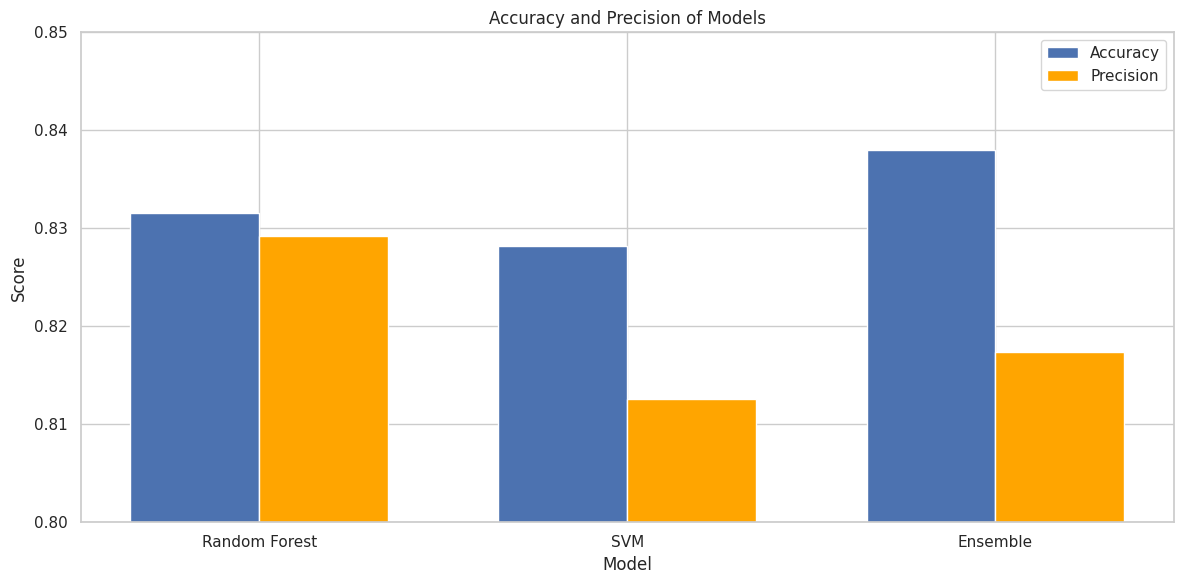

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Combined Bar Plot for Accuracy and Precision
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(results_df))

# Plot Accuracy bars
bars1 = plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='b')

# Plot Precision bars
bars2 = plt.bar([i + bar_width for i in index], results_df['Precision'], bar_width, label='Precision', color='orange')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision of Models')
plt.xticks([i + bar_width / 2 for i in index], results_df['Model'])
plt.ylim(0.8, 0.85)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
